<a href="https://colab.research.google.com/github/NackPedro/indicium-challenge/blob/main/LH_CD_PEDRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [856]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [857]:
dataframe = pd.read_csv('desafio_indicium_imdb.csv')
dataframe.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


#1- Análise exploratória dos dados

In [858]:
dataframe = dataframe.drop('Unnamed: 0', axis=1)
dataframe['Released_Year'] = pd.to_numeric(dataframe['Released_Year'], errors='coerce') # converte ano

dataframe['Gross'] = dataframe['Gross'].replace(',', '', regex=True) #conserta e converte faturamento
dataframe['Gross'] = pd.to_numeric(dataframe['Gross'], errors='coerce')

dataframe['Runtime'] = dataframe['Runtime'].replace(' min', '', regex=True) # conserta e converte runtime
dataframe['Runtime'] = pd.to_numeric(dataframe['Runtime'], errors='coerce')

og_dataframe = dataframe.copy()


In [859]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.2+ KB


In [860]:
print((dataframe.isnull().sum()))

Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


Certificate, meta_score e gross possuem entradas vazias em alguns registros. Um registro tinha "Released_Year" como uma string sem sentido.

In [861]:
dataframe.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.214429,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.308539,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


Aqui vemos algumas informações interessantes:
- Os registros de filmes vão até o ano 2020.
- IMDB Rating (7.6-9.2) tem valores variando em um range bem menor que Meta Score (28-100). O número menor de avaliadores em Meta Score faz com que seja mais fácil alcançar um consenso, além da demografia neste grupo ser provavelmente mais homogênea, levando as notas dos filmes para os extremos. Contudo, a média das notas é bem parecida (7.9 e 77.9).
- Gross apresenta um range de valores MUITO vasto (filmes flopados/nichados e blockbusters).

In [862]:
dataframe.select_dtypes(include=['number']).corr()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165765,-0.133257,-0.339291,0.246005,0.233270
Runtime,0.165765,1.000000,0.242751,-0.031604,0.172483,0.140002
IMDB_Rating,-0.133257,0.242751,1.000000,0.271374,0.479308,0.099393
Meta_score,-0.339291,-0.031604,0.271374,1.000000,-0.020091,-0.030480
No_of_Votes,0.246005,0.172483,0.479308,-0.020091,1.000000,0.589527
Gross,0.233270,0.140002,0.099393,-0.030480,0.589527,1.000000


Temos aqui a matriz de correlação, indicando a correlação entre os valores das variáveis (útil para definir quais serão utilizadas para treinamento do modelo de ML nos próximos passos).

Vemos uma relação considerável entre IMDB Rating e Runtime ou Meta Score.

A matriz aponta uma relação pequena entre IMBD Rating e faturamento de um filme. Contudo, 'Gross' é uma variável com enorme variação, como visto no gráfico a seguir, o que pode dificultar essa análise "simples" (veremos os resultados efetivos na seção de treinamento do modelo).

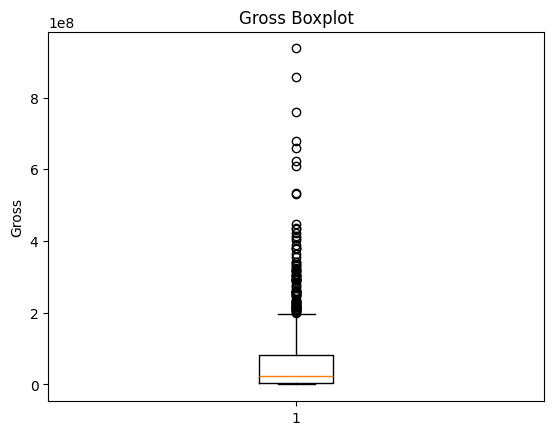

In [863]:
clean_gross = dataframe.dropna(subset=['Gross'])    # removendo os nulos
plt.boxplot(clean_gross['Gross'])
plt.title("Gross Boxplot")
plt.ylabel("Gross")
plt.show()

A matrix também apresenta correlação bastante significativa entre IMBD Rating e número de votos. Filmes muito populares costumam ter notas melhores, como visualizado a seguir.

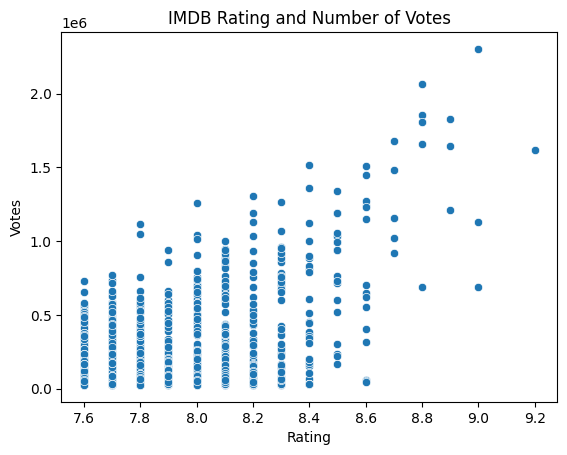

In [864]:
sns.scatterplot(dataframe, x='IMDB_Rating', y='No_of_Votes')
plt.title("IMDB Rating and Number of Votes")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.show()

Percebe-se que filmes mais populares costumam ser mais bem avaliados, representando filmes clássicos e aprovados pelo público geral, como demonstrado pelo gráfico seguinte.

In [865]:
print(dataframe['IMDB_Rating'].mean())

7.947947947947948


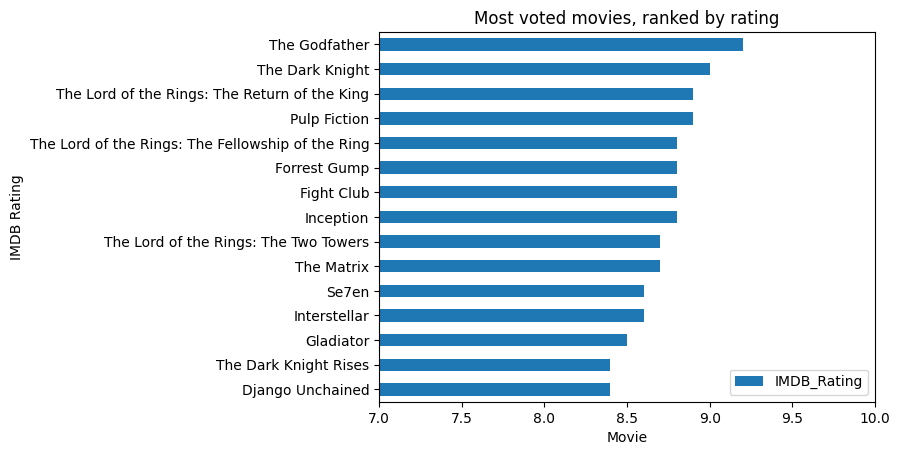

In [866]:
top_movies = dataframe.sort_values(by='No_of_Votes', ascending=False).head(15)
top_movies = top_movies.sort_values(by='IMDB_Rating', ascending=True)
top_movies.plot(x='Series_Title', y='IMDB_Rating', kind='barh')
plt.title("Most voted movies, ranked by rating")
plt.xlabel("Movie")
plt.ylabel("IMDB Rating")
plt.xlim(7,10)
plt.show()

Aqui vemos os filmes mais votados. Vimos que a nota média de um filme é de 7.9, e todos esses filmes amplamente conhecidos apresentam notas bem acima deste valor.

Distribuição das avaliações dos filmes pelo IMDB e Meta Score:

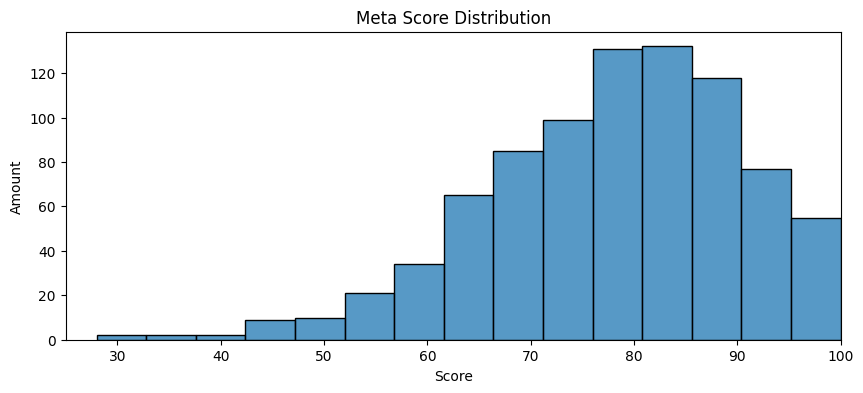

In [867]:
plt.figure(figsize=(10,4))
sns.histplot(dataframe['Meta_score'].dropna(), bins=15)
plt.title("Meta Score Distribution")
plt.xlim(25,100)
plt.xlabel("Score")
plt.ylabel("Amount")
plt.show()

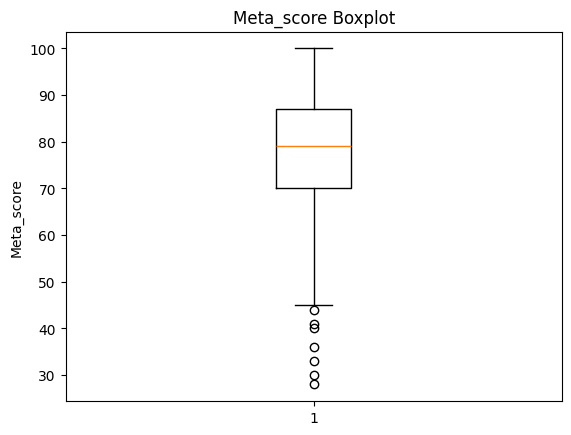

In [868]:
clean_meta = dataframe.dropna(subset=['Meta_score'])    # removendo os nulos
plt.boxplot(clean_meta['Meta_score'])
plt.title("Meta_score Boxplot")
plt.ylabel("Meta_score")
plt.show()

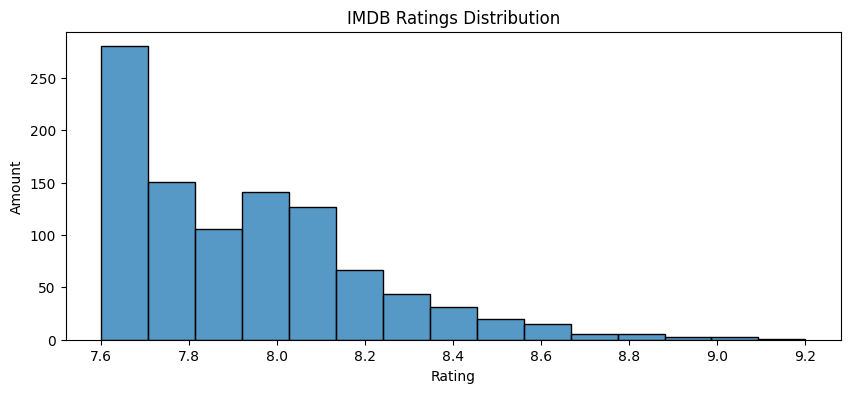

In [869]:
plt.figure(figsize=(10,4))
sns.histplot(dataframe['IMDB_Rating'], bins=15)
plt.title("IMDB Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Amount")
plt.show()

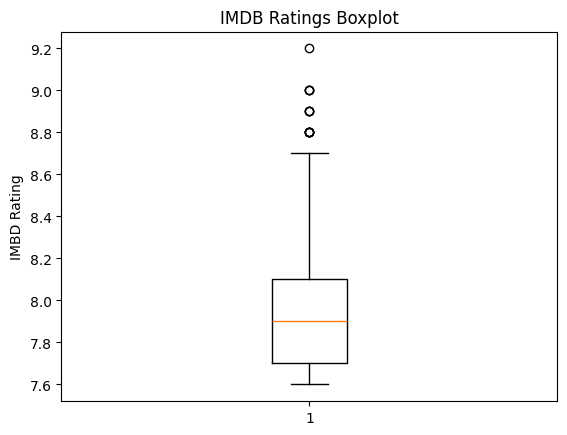

In [870]:
plt.boxplot(dataframe['IMDB_Rating'])
plt.title("IMDB Ratings Boxplot")
plt.ylabel("IMBD Rating")
plt.show()

Nota-se que o Meta Score varia entre um range de valores bastante maior que o IMDB Rating, como apontado e justificado posteriormente. A presença de outliers no gráfico de Meta_score aponta que há mais consenso entre os críticos para detonar filmes.

##GENRE

In [871]:
different_genres = []
for genres in dataframe['Genre']:
    for genre in genres.split(', '):
        if genre not in different_genres:
            different_genres.append(genre)
print(different_genres)
print(len(different_genres))

['Crime', 'Drama', 'Action', 'Adventure', 'Biography', 'History', 'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Comedy', 'Thriller', 'Animation', 'Family', 'War', 'Mystery', 'Music', 'Horror', 'Musical', 'Film-Noir', 'Sport']
21


In [872]:
X = dataframe['Genre'].str.get_dummies(sep=', ')

One Hot Encoding dos 21 gêneros presentes, para melhor análise



A seguir, temos gráficos que apresentam os gêneros de filmes mais populares, o faturamento médio para cada gênero e uma breve discussão sobre o que foi observado.

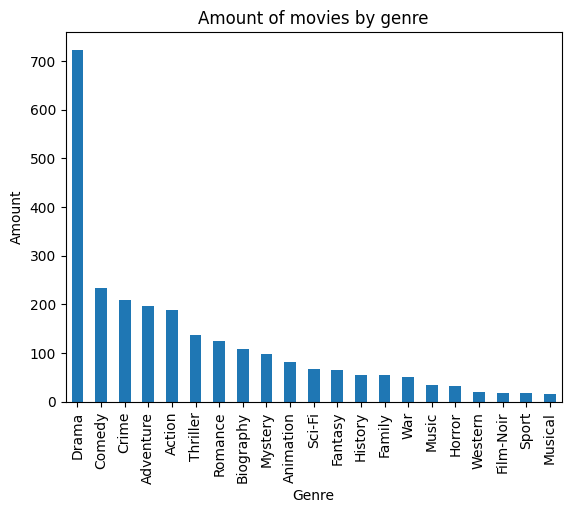

In [873]:
for genre in X:
    dataframe[genre] = X[genre]
genre_count = dataframe[different_genres].sum().sort_values(ascending=False)
ax = genre_count.plot(kind='bar')
#for p in ax.patches:
#    ax.annotate(f"{p.get_height()}", (p.get_x(), p.get_height()))
plt.title("Amount of movies by genre")
plt.xlabel("Genre")
plt.ylabel("Amount")
plt.show()

In [874]:
dataframe.loc[dataframe['Comedy'] == 1, 'Gross'].mean()

np.float64(64125296.22513089)

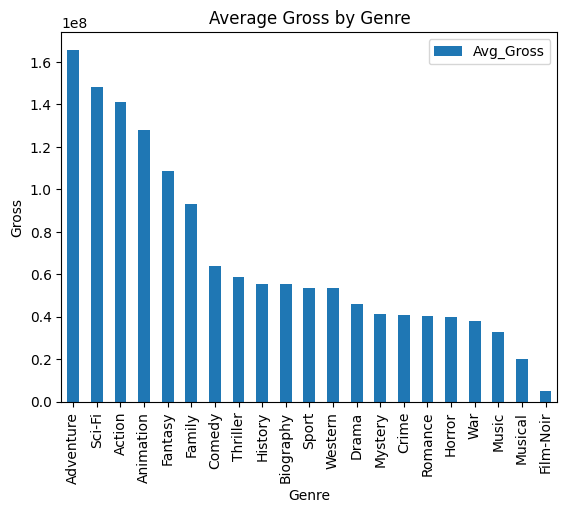

In [875]:
gross_by_genre = {}

for genre in different_genres:
    average_gross = dataframe.loc[dataframe[genre] == 1, 'Gross'].mean()
    gross_by_genre[genre] = average_gross

average_gross_df = pd.DataFrame(gross_by_genre.items(), columns=['Genre', 'Avg_Gross'])
average_gross_df = average_gross_df.sort_values(by='Avg_Gross', ascending=False)

average_gross_df.plot(x='Genre', y='Avg_Gross', kind='bar')
plt.title("Average Gross by Genre")
plt.ylabel("Gross")
plt.xlabel("Genre")
plt.show()

Vemos aqui que Drama é disparadamente o gênero mais popular. Contudo, este gênero apresenta faturamento médio relativamente baixo. A quantidade muito grande de filmes classificados como drama pode diluir o faturamento médio do gênero quando comparado com os outros, como vemos no seguinte gráfico, que apresenta bastante outliers e uma mediana bem baixa.

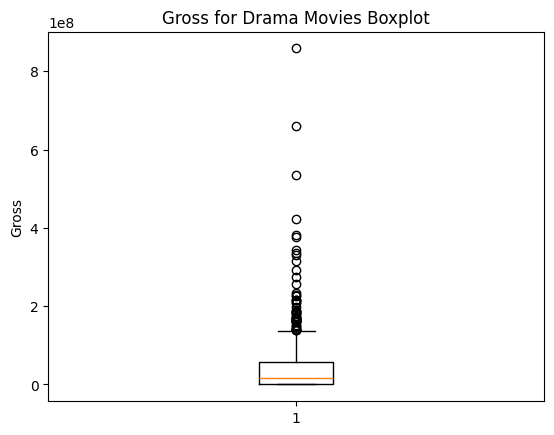

In [876]:
clean_gross = dataframe.dropna(subset=['Gross'])
drama_df = clean_gross.loc[clean_gross['Drama'] == 1, ['Gross']]
plt.boxplot(drama_df)
plt.title("Gross for Drama Movies Boxplot")
plt.ylabel("Gross")
plt.show()

O segundo gênero mais popular é o de Aventura, com uma quantidade de filmes muito menor que Drama, e esse gênero apresenta o maior faturamento médio. O seguinte gráfico boxplot para filmes de Aventura demonstra a pequena quantidade de outliers, ou seja, é um dos gêneros mais consistentes. O terceiro quartil e o valor máximo mais elevados mostram o sucesso do gênero.

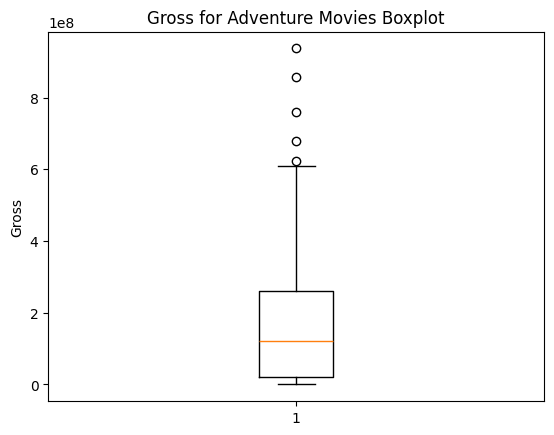

In [877]:
adventure_df = clean_gross.loc[clean_gross['Adventure'] == 1, ['Gross']]
plt.boxplot(adventure_df)
plt.title("Gross for Adventure Movies Boxplot")
plt.ylabel("Gross")
plt.show()

Algo que me chamou atenção foram os filmes de Comédia. É o terceiro filme mais popular e apresentou faturamento mediano. Percebe-se pelos valores da coluna Y que o gênero não possui sucessos de bilheteria tão grandes quanto os dois gêneros anteriores, e a grande quantidade de outliers mostra que o gênero é muito *hit or miss*.

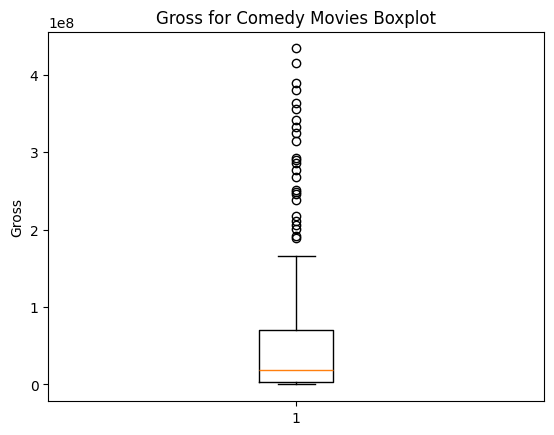

In [878]:
comedy_df = clean_gross.loc[clean_gross['Comedy'] == 1, ['Gross']]
plt.boxplot(comedy_df)
plt.title("Gross for Comedy Movies Boxplot")
plt.ylabel("Gross")
plt.show()

Vemos a seguir que com o passar dos anos, entre os filmes mais populares, o ranking de gêneros mais comuns não teve grandes alterações, porém percebe-se um crescimento grande na quantidade de filmes caracterizados como "Drama".

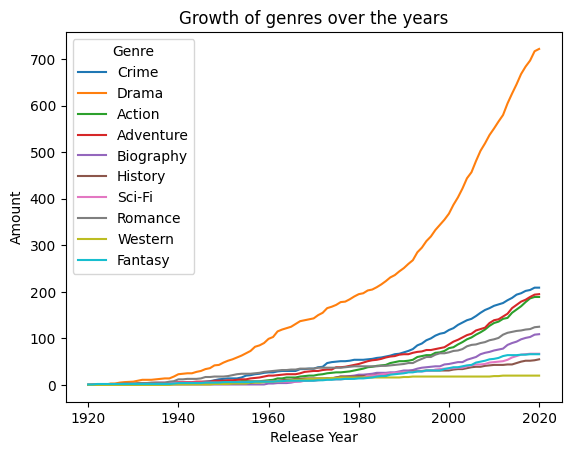

In [879]:
genre_trends = dataframe.groupby("Released_Year")[different_genres[:10]].sum()
genre_trends = genre_trends.cumsum()
genre_trends.plot(kind="line")
plt.title("Growth of genres over the years")
plt.xlabel("Release Year")
plt.ylabel("Amount")
plt.legend(title="Genre")
plt.show()

Para análise dos diretores, considerei apenas os que tinham pelo menos 5 filmes registrados, para que seja possível avaliar a consistência nos seus trabalhos.

In [880]:
popular_directors = dataframe.groupby('Director').agg({'IMDB_Rating': 'mean', 'Series_Title': 'count'}).sort_values(by='Series_Title', ascending=False)
popular_directors = popular_directors[popular_directors['Series_Title'] >= 3]
print(popular_directors)

                    IMDB_Rating  Series_Title
Director                                     
Alfred Hitchcock       8.007143            14
Steven Spielberg       8.030769            13
Hayao Miyazaki         8.018182            11
Martin Scorsese        8.170000            10
Akira Kurosawa         8.220000            10
...                         ...           ...
William Wyler          8.033333             3
J.J. Abrams            7.833333             3
Alejandro Amenábar     7.766667             3
Alan Parker            7.833333             3
Tom McCarthy           7.766667             3

[97 rows x 2 columns]


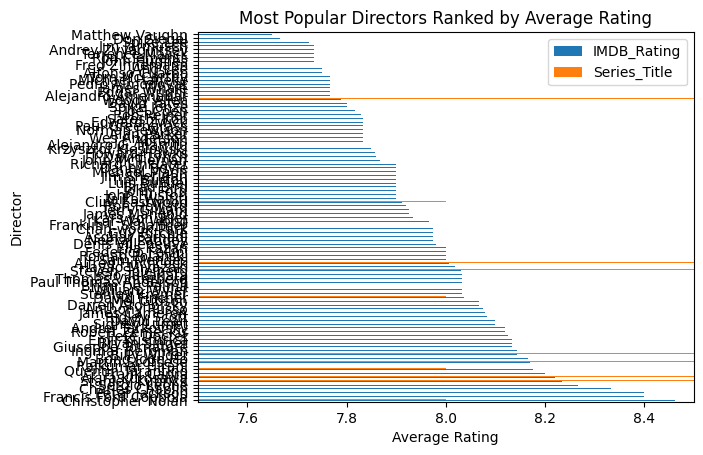

In [881]:
#popular_directors = popular_directors.sort_values(by='IMDB_Rating', ascending=False).drop('Series_Title', axis=1)
popular_directors = popular_directors.sort_values(by='IMDB_Rating', ascending=False)
popular_directors.plot(kind='barh')
plt.title("Most Popular Directors Ranked by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Director")
plt.xlim(7.5, 8.5)
plt.show()

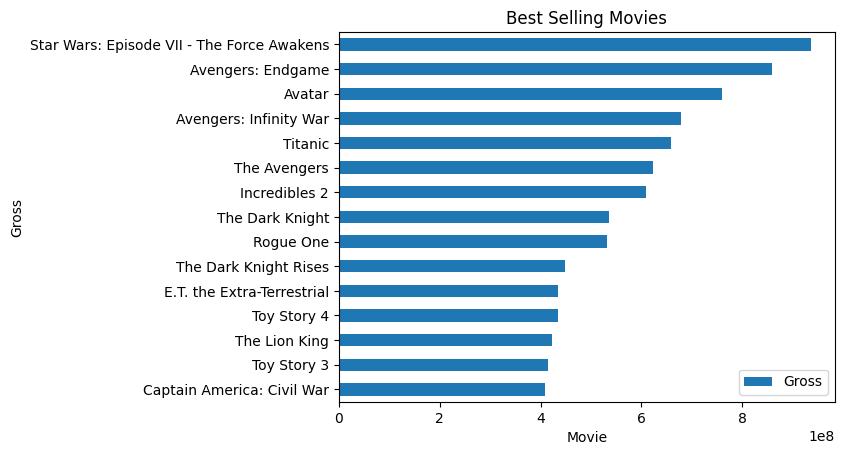

In [882]:
top_movies = dataframe.sort_values(by='Gross', ascending=False).head(15)
top_movies = top_movies.sort_values(by='Gross', ascending=True)
top_movies.plot(x='Series_Title', y='Gross', kind='barh')
plt.title("Best Selling Movies")
plt.xlabel("Movie")
plt.ylabel("Gross")
plt.show()

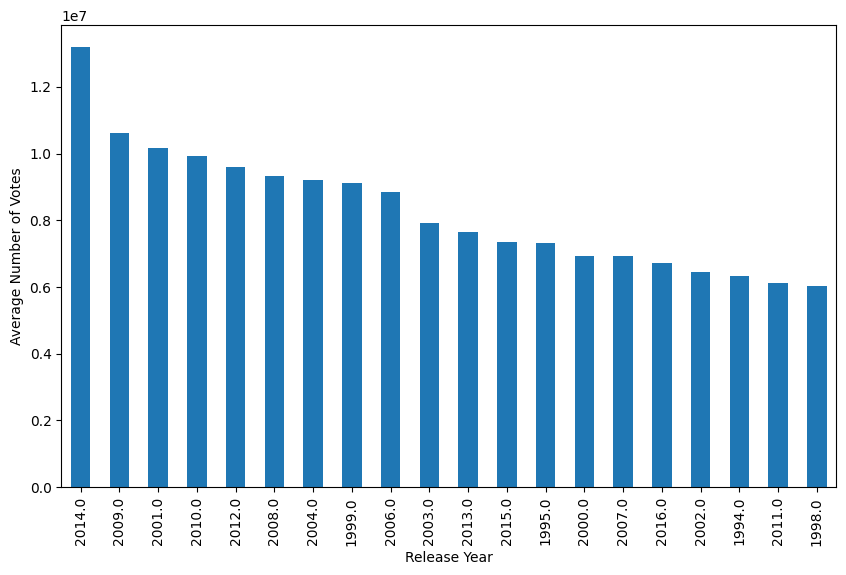

In [883]:
avg_gross_by_year = dataframe.groupby('Released_Year')['No_of_Votes'].sum().sort_values(ascending=False).head(20)
avg_gross_by_year.plot(x='Genre', y='Avg_Gross', kind='bar', figsize=(10,6))
plt.xlabel('Release Year')
plt.ylabel('Average Number of Votes')
plt.show()

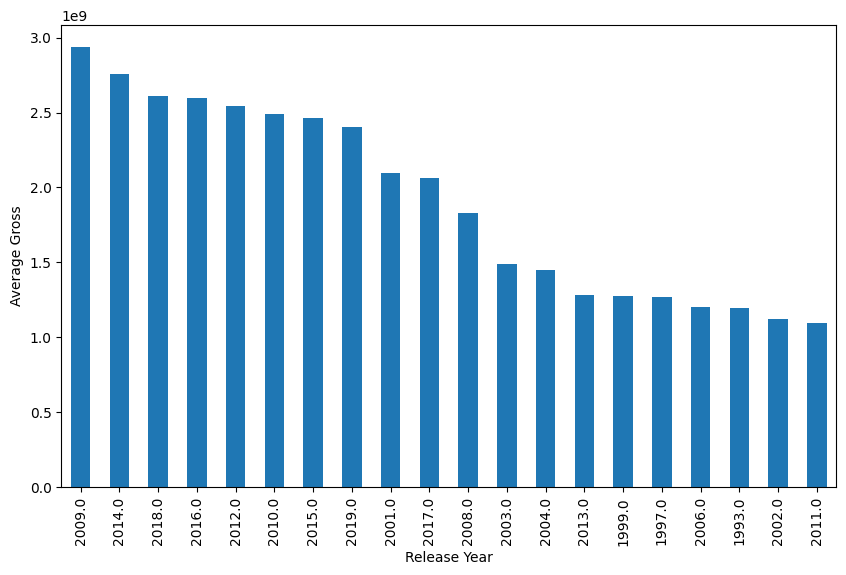

In [884]:
avg_gross_by_year = dataframe.groupby('Released_Year')['Gross'].sum().sort_values(ascending=False).head(20)
avg_gross_by_year.plot(x='Genre', y='Avg_Gross', kind='bar', figsize=(10,6))
plt.xlabel('Release Year')
plt.ylabel('Average Gross')
plt.show()

Vemos que filmes com lançamento a partir dos anos 2000 dominam os gráficos de faturamento e número de votantes médio. Vemos aqui estes mesmos dados organizados por décadas para uma visualização mais clara:

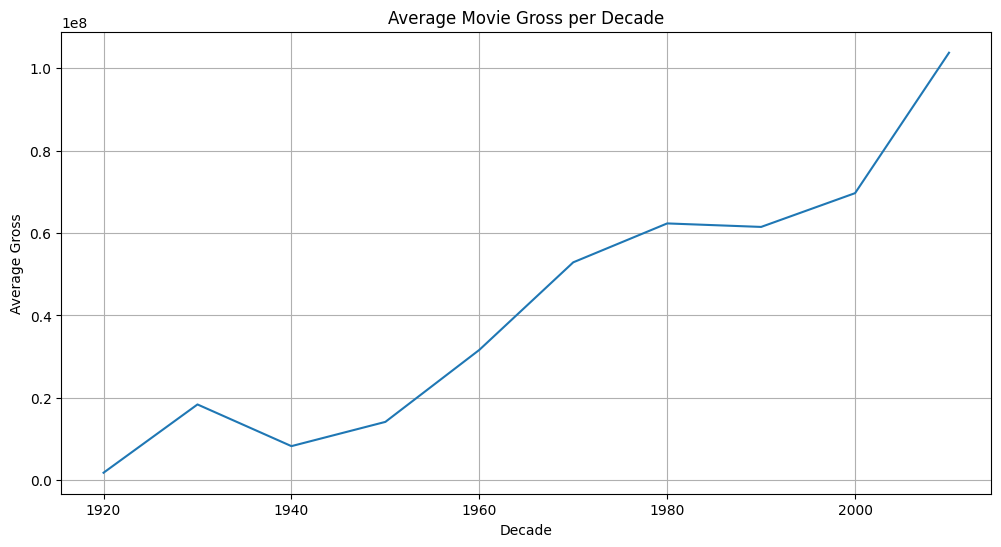

In [885]:
dataframe['Decade'] = dataframe['Released_Year']//10 * 10

avg_gross_per_year = dataframe.groupby('Decade')['Gross'].mean()

avg_gross_per_year.plot(kind='line', figsize=(12,6))
plt.title("Average Movie Gross per Decade")
plt.ylabel("Average Gross")
plt.xlabel("Decade")
plt.grid(True)
plt.show()

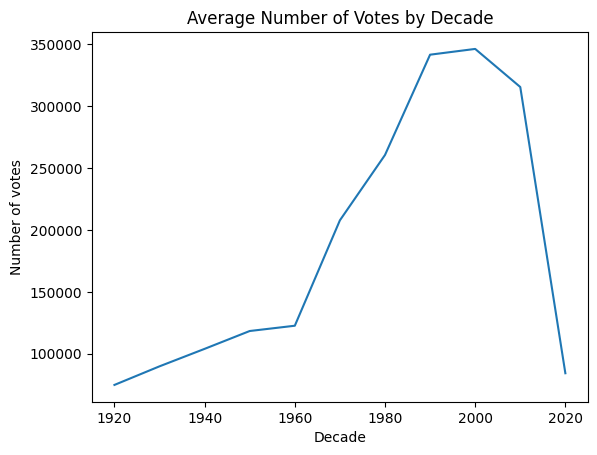

In [886]:
ratings_by_decade = dataframe.groupby('Decade')['No_of_Votes'].mean()
ratings_by_decade.plot(kind='line')
plt.title("Average Number of Votes by Decade")
plt.ylabel("Number of votes")
plt.xlabel("Decade")
plt.show()

In [887]:
print(dataframe['Released_Year'].max())
print(len(dataframe[dataframe['Decade'] == 2020.0]))

2020.0
6


A quantidade de votos tem uma enorme queda para a década de 2020. Isso provavelmente se dá pela recência dos dados. Os filmes mais recentes do dataset são do ano 2020, indicando que o dataset deve ter sido gerado neste mesmo ano. Dado o lançamento recente, um número menor de pessoas assistiram e avaliaram o filme.

O gráfico de faturamento médio do filme demonstra um faturamento elevado para a década de 2020, contribuindo para a hipótese de que a queda no número de votos não indica uma queda no interesse pelo filme.

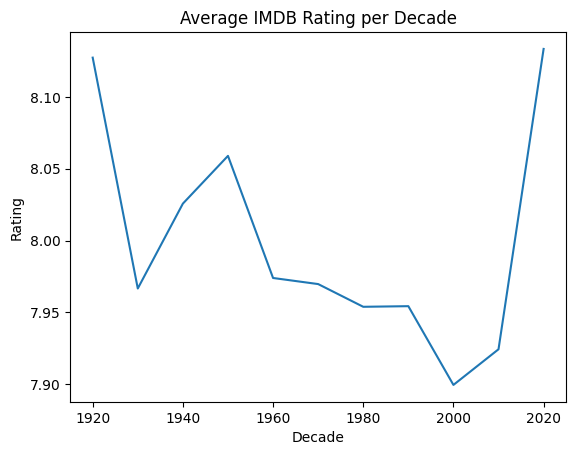

In [888]:
dataframe['Decade'] = dataframe['Released_Year']//10 * 10
ratings_by_decade = dataframe.groupby('Decade')['IMDB_Rating'].mean()
ratings_by_decade.plot(kind='line')
plt.title("Average IMDB Rating per Decade")
plt.ylabel("Rating")
plt.xlabel("Decade")
plt.show()

No gráfico de nota média do IMDB, vemos um grande pico no ano 2020. Isso também deve ser relacionado à quantidade menor de filmes e votos, que acaba não representando apropriadamente a realidade.

Além desse pico, percebe-se uma decrescência nas notas médias dos filmes. Isso pode ser relacionado com o número maior de votos em filmes mais recentes (como visto nos gráficos anteriores).

##**CERTIFICATE**

In [889]:
clean_certificate = dataframe.dropna(subset=['Certificate']) # tinha registros nulos
grouped_certificate = clean_certificate.groupby('Certificate')

In [890]:
certificate_amount = grouped_certificate.size().sort_values(ascending=True)
print(certificate_amount)

Certificate
16            1
Unrated       1
TV-MA         1
TV-14         1
U/A           1
GP            2
TV-PG         3
Approved     11
G            12
Passed       34
PG           37
PG-13        43
R           146
UA          175
A           196
U           234
dtype: int64


algumas classificações são muito raras, não valem muito a pena serem consideradas

In [891]:
relevant_certificate = certificate_amount[certificate_amount >= 30]
print(relevant_certificate.index)

Index(['Passed', 'PG', 'PG-13', 'R', 'UA', 'A', 'U'], dtype='object', name='Certificate')


###Nota média por certificate (com quantidades significativas)

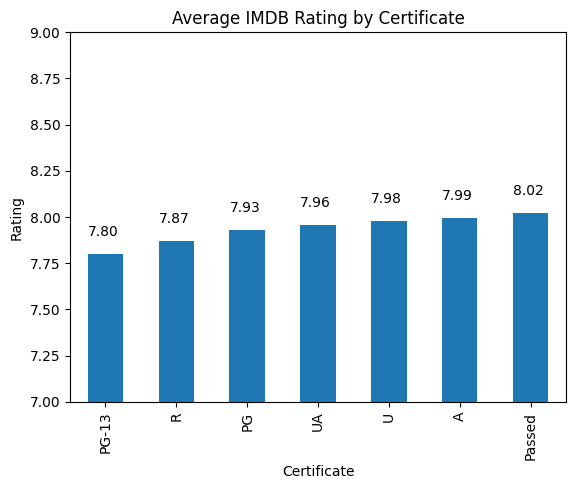

In [892]:
relevant_df = dataframe[dataframe['Certificate'].isin(relevant_certificate.index)]
certificate_rating = relevant_df.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=True)
ax = certificate_rating.plot(kind='bar')
plt.title("Average IMDB Rating by Certificate")
plt.xlabel("Certificate")
plt.ylabel("Rating")
plt.ylim(7,9)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x(), p.get_height() + 0.1))
plt.show()

Percebe-se uma nota menores para filmes da classificação mais adulta (PG-13, PG, R)

Essa análise aponta que o certificate parece impactar na nota final do filme.

##**RUNTIME**

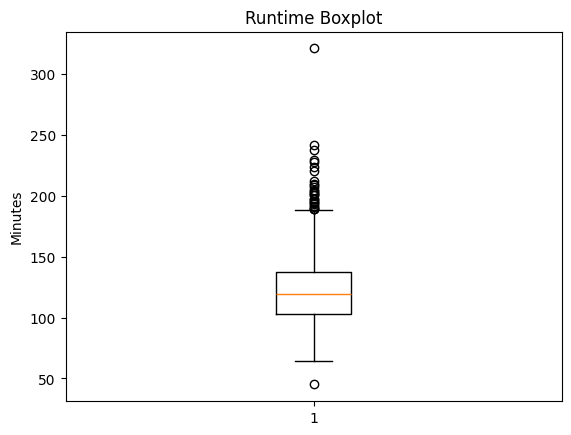

In [893]:
plt.boxplot(dataframe['Runtime'])
plt.title("Runtime Boxplot")
plt.ylabel("Minutes")
plt.show()

In [894]:
print(dataframe['Runtime'].min())
print(dataframe['Runtime'].max())

45
321


Vemos aqui os dois outliers mais distoantes, com 45 e 321 minutos de duração.

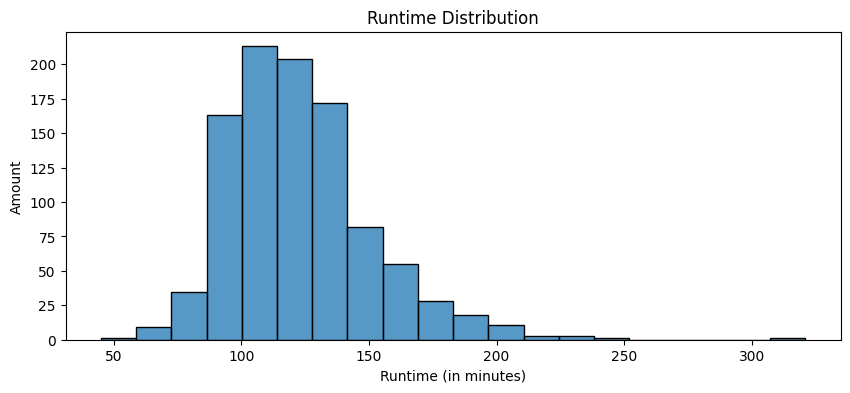

In [895]:
plt.figure(figsize=(10,4))
sns.histplot(dataframe['Runtime'], bins=20)
plt.title("Runtime Distribution")
plt.xlabel("Runtime (in minutes)")
plt.ylabel("Amount")
plt.show()

Descobi a função "cut", que utilizei para colocar a informação em bins para agrupamento de filmes com duração parecida, melhorando a análise.

/tmp/ipython-input-1308444611.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_interval = dataframe.groupby('Runtime_Interval')['IMDB_Rating'].mean()


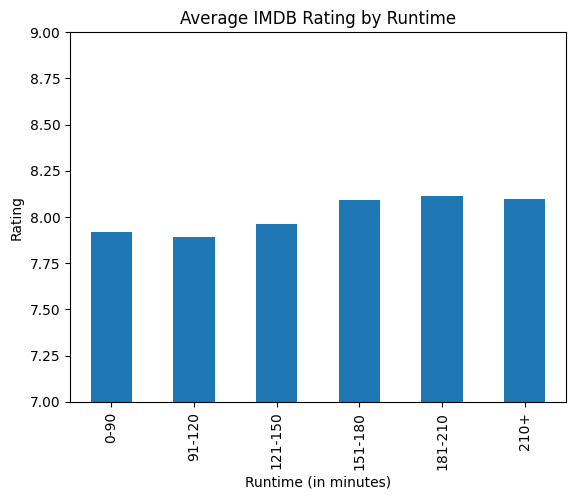

In [896]:
bins = [0, 90, 120, 150, 180, 210, 1000]
labels = ['0-90', '91-120', '121-150', '151-180', '181-210', '210+']

dataframe['Runtime_Interval'] = pd.cut(dataframe['Runtime'], bins=bins, labels=labels)

rating_by_interval = dataframe.groupby('Runtime_Interval')['IMDB_Rating'].mean()

rating_by_interval.plot(kind='bar')
plt.title("Average IMDB Rating by Runtime")
plt.xlabel("Runtime (in minutes)")
plt.ylabel("Rating")
plt.ylim(7,9)
plt.show()


Filmes mais curtos parecem receber notas piores.

##ACTOR

Os atores estão distribuídos em 4 colunas, dificultando um pouco a análise

In [897]:
actor_columns = ["Star1", "Star2", "Star3", "Star4"]

Coloquei aqui os atores em um dataframe só com a contagem de filmes e nota média dos filmes em que participam

In [898]:
actors = {}
actors_dataframe = pd.DataFrame(columns=["Actor", "Movie_Count", "Movie_Rating"])

for column in actor_columns:
    for i in range(dataframe.shape[0]):
        actor = dataframe.iloc[i][column]
        if actor in actors.keys():
            actors[actor][0] += 1
            actors[actor][1] += dataframe.iloc[i]['IMDB_Rating']
        else:
            actors[actor] = [1, dataframe.iloc[i]['IMDB_Rating']]
actors_dataframe = pd.DataFrame([{"Actor": actor, "Movie_Count": val[0], "Movie_Rating": val[1]/val[0]} for actor, val in actors.items()])

print(actors_dataframe)


               Actor  Movie_Count  Movie_Rating
0      Marlon Brando            4      8.425000
1     Christian Bale           11      8.045455
2          Al Pacino           13      8.076923
3        Henry Fonda            4      8.275000
4        Elijah Wood            3      8.800000
...              ...          ...           ...
2702     Ringo Starr            1      7.600000
2703     Buddy Ebsen            1      7.600000
2704   Carroll Baker            1      7.600000
2705  William Bendix            1      7.600000
2706  Godfrey Tearle            1      7.600000

[2707 rows x 3 columns]


Para assim observar os 15 atores mais populares, ordenados por a nota média de seus filmes

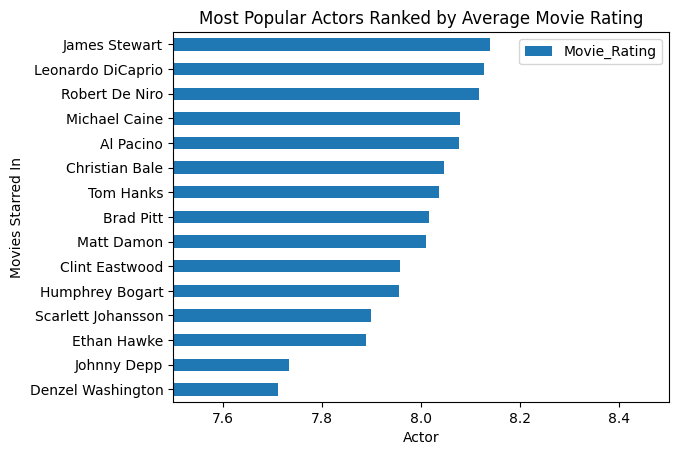

In [899]:
top_actors = actors_dataframe.sort_values(by='Movie_Count', ascending=False).head(15)
top_actors = top_actors.sort_values(by='Movie_Rating', ascending=True)
top_actors.plot(x='Actor', y='Movie_Rating', kind='barh')
plt.title("Most Popular Actors Ranked by Average Movie Rating")
plt.xlabel("Actor")
plt.ylabel("Movies Starred In")
plt.xlim(7.5, 8.5)
plt.show()

#2- Perguntas

##a) Qual filme você recomendaria para uma pessoa que você não conhece?

Por se tratar de uma pessoa desconhecida, eu escolheria um filme mais "genérico", ou seja, um filme que esteja entre os mais populares do site, mas que também tenha uma boa nota, indicando que o filme agrada boa parte do seu vasto público.

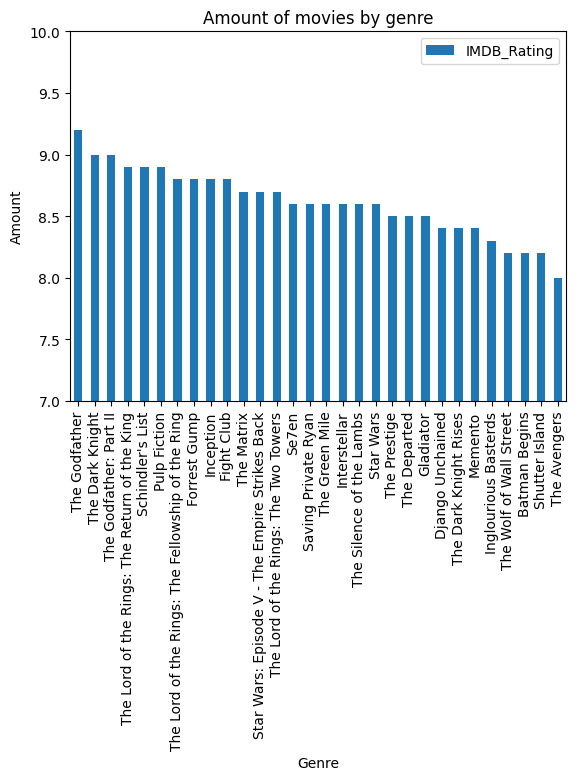

In [900]:
generally_liked_movies = dataframe.nlargest(30, 'No_of_Votes').sort_values(by='IMDB_Rating', ascending=False)

ax = generally_liked_movies.plot(x='Series_Title', y='IMDB_Rating', kind='bar')
plt.title("Amount of movies by genre")
plt.xlabel("Genre")
plt.ylabel("Amount")
plt.ylim(7, 10)
plt.show()

Dado o gráfico apresentado, o título recomendado seria The Godfather, The Dark Knight, The Godfather II, TLOTR or Schindler's List.

##b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

In [901]:
og_dataframe.select_dtypes(include=['number']).corr()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165765,-0.133257,-0.339291,0.246005,0.233270
Runtime,0.165765,1.000000,0.242751,-0.031604,0.172483,0.140002
IMDB_Rating,-0.133257,0.242751,1.000000,0.271374,0.479308,0.099393
Meta_score,-0.339291,-0.031604,0.271374,1.000000,-0.020091,-0.030480
No_of_Votes,0.246005,0.172483,0.479308,-0.020091,1.000000,0.589527
Gross,0.233270,0.140002,0.099393,-0.030480,0.589527,1.000000


Podemos ver que a matriz de correlação indica que o faturamento de um filme é bastante relacionado com o número de votos, e razoavelmente relacionado com ano de lançamento e duração, como melhor representado nos gráficos a seguir.

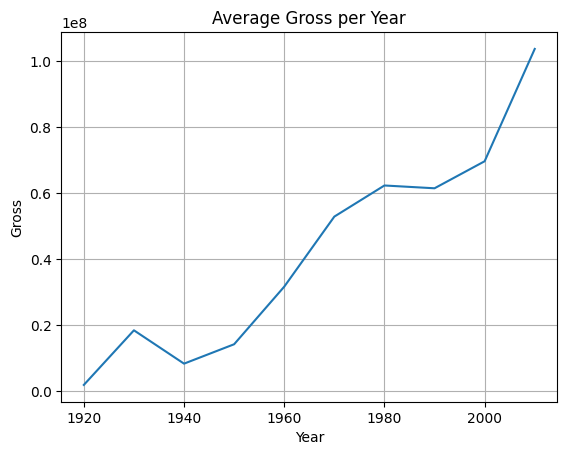

In [902]:
gross_per_year = dataframe.groupby('Decade')['Gross'].mean()

gross_per_year.plot(kind='line')
plt.title("Average Gross per Year")
plt.ylabel("Gross")
plt.xlabel("Year")
plt.grid(True)
plt.show()

Vemos aqui um grande crescimento no faturamento dos filmes com o passar dos anos.

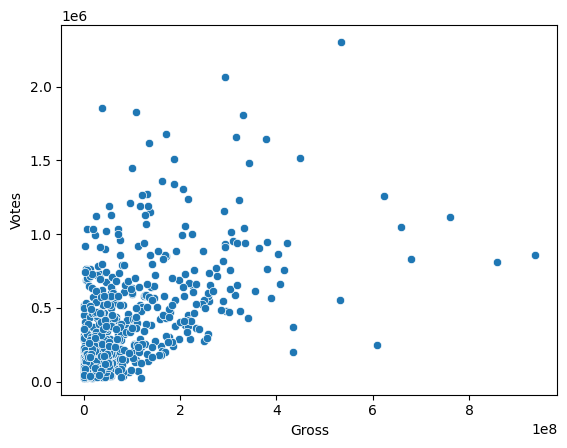

In [903]:
sns.scatterplot(data=dataframe, x='Gross', y='No_of_Votes')
plt.xlabel("Gross")
plt.ylabel("Votes")
plt.show()

Percebe-se uma grande concentração dos filmes no canto inferior esquerdo, com baixo faturamento e baixo número de votos.

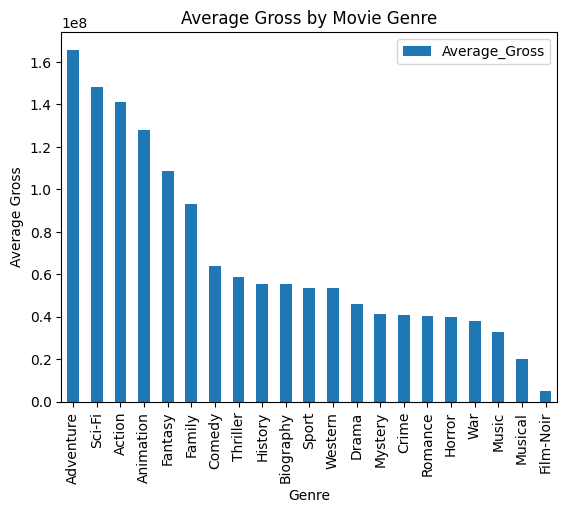

In [904]:
gross_by_genre = {}

for genre in different_genres:
    average_gross = dataframe.loc[dataframe[genre] == 1, 'Gross'].mean()
    gross_by_genre[genre] = average_gross

average_gross_df = pd.DataFrame(gross_by_genre.items(), columns=['Genre', 'Average_Gross'])
average_gross_df = average_gross_df.sort_values(by='Average_Gross', ascending=False)

average_gross_df.plot(x='Genre', y='Average_Gross', kind='bar')
plt.title("Average Gross by Movie Genre")
plt.ylabel("Average Gross")
plt.xlabel("Genre")
plt.show()

Vemos aqui também a relação entre gênero e faturamento do filme. Filmes de aventura, ficção científica e ação são os que mais faturam.

##c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [905]:
print(dataframe['Overview'].apply(len).mean())

146.28328328328328


A coluna Overview pode ser analisada utilizando algumas técnicas de ML e PLN para inferir o gênero de um filme ou agrupar filmes com temáticas similares.

Uma das formas seria utilizando LLMs para classificação do gênero baseado na coluna Overview.

Por outro lado, podemos usar técnicas de aprendizado supervisionado para classificar o gênero de filmes baseado na descrição. Isso pode ser feito através da geração de uma representação vetorial para a Overview do filme. Um modelo então pode ser treinado com estas representações e os gêneros dos filmes, com o objetivo de classificar o gênero de Overviews novas.

Outra forma de avaliar a coluna seria com aprendizado não supervisionado. Com essa abordagem, pode ser feita uma clusterização das descrições dos filmes, agrupando filmes com temas parecidos para uma análise dos tópicos.

## Análise de Tópicos

In [906]:
# Download de bibliotecas para remoção das stopwords e pre processamento
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [907]:
stop_words = set(stopwords.words('english'))
tokenized_overviews = []
for overview in dataframe['Overview']:
    overview = overview.lower()   # padroniza letra minuscula
    overview = re.sub("[^a-zA-Z]"," ", overview)     # deixa somente letras
    tokenized_overview = word_tokenize(overview)    # tokeniza
    filtered_tokens = [word for word in tokenized_overview if word not in stop_words] # remove stopwords
    tokenized_overviews.append(" ".join(filtered_tokens))
print(tokenized_overviews)

['organized crime dynasty aging patriarch transfers control clandestine empire reluctant son', 'menace known joker wreaks havoc chaos people gotham batman must accept one greatest psychological physical tests ability fight injustice', 'early life career vito corleone new york city portrayed son michael expands tightens grip family crime syndicate', 'jury holdout attempts prevent miscarriage justice forcing colleagues reconsider evidence', 'gandalf aragorn lead world men sauron army draw gaze frodo sam approach mount doom one ring', 'lives two mob hitmen boxer gangster wife pair diner bandits intertwine four tales violence redemption', 'german occupied poland world war ii industrialist oskar schindler gradually becomes concerned jewish workforce witnessing persecution nazis', 'thief steals corporate secrets use dream sharing technology given inverse task planting idea mind c e', 'insomniac office worker devil may care soapmaker form underground fight club evolves something much much', '

In [908]:
# Download de bibliotecas para análise de tópicos
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.colors as mcolors


In [909]:
num_topics = 4

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_overviews)

lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

lda.fit(X)    # treinamento do modelo para os tópicos

topics = []
feature_names = vectorizer.get_feature_names_out()
for topic_id, topic in enumerate(lda.components_):
    words = [feature_names[i] for i in topic.argsort()[:-10 - 1: -1]]
    topics.append(" ".join(words))

In [910]:
print(topics)

['two world war man life find love young story american', 'young woman man world new one must story family war', 'young life old school man new girl lives boy becomes', 'life man two new city year family wife world must']


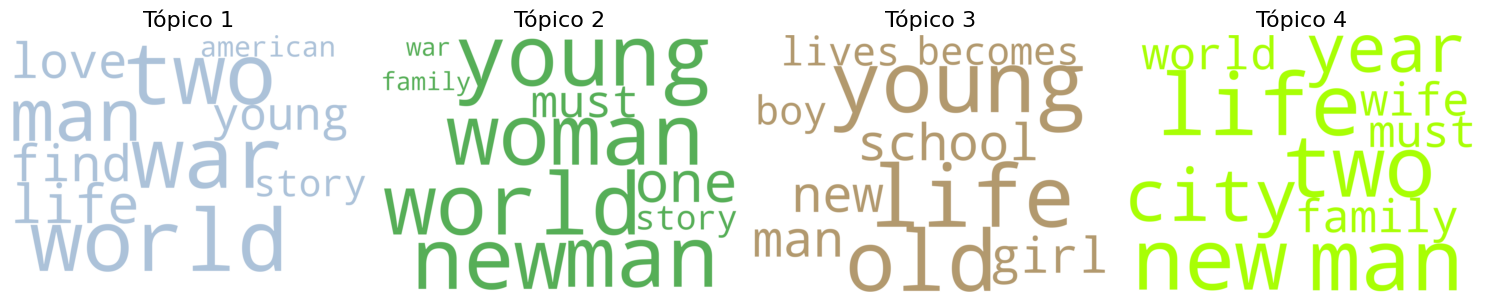

In [911]:
# Wordcloud para mostrar os tópicos (código do curso de Modelagem de Tópicos da Indicium)
cols = [color for name, color in mcolors.XKCD_COLORS.items()]

cloud = WordCloud(stopwords=None,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(1, num_topics, figsize=(15, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    topic_words = dict(zip(topics[i].split(), [1] * len(topics[i].split())))
    cloud.color_func = lambda *args, **kwargs: cols[i % len(cols)]
    cloud.generate_from_frequencies(topic_words, max_font_size=600)
    ax.imshow(cloud, interpolation='bilinear')
    ax.set_title(f"Tópico {i+1}", fontsize=16)
    ax.axis("off")

plt.subplots_adjust(wspace=0.2, hspace=0)
plt.tight_layout()
plt.show()


Tópicos razoavelmente similares, o que faz sentido considerando que grande parte dos filmes do dataset eram do gênero "Drama"

Tópico 1: palavras como 'war', 'world', 'life', 'american' indicam filmes de guerra

Tópico 2: palavras como 'story', 'family', 'young', 'must' indicam filmes com histórias dramáticas

Tópico 3: palavras como 'becomes', 'school', 'young', 'boy', 'girl', 'life' mostram filmes relacionados a juventude

Tópico 4: palavras como 'family', 'man', 'new', 'life', 'city', 'wife' podem ser relacionados com filmes de romance ou temas familiares

## Tentativa de Classificação de Filmes pela Descrição

In [912]:
# import das bibliotecas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
'''OneVsRestClassifier faz uma comparacao entre os labels para encontrar
a resposta. aqui usei regressao logistica'''
from sklearn.linear_model import LogisticRegression

In [913]:
vectorizer = TfidfVectorizer()    # formato TF-IDF das overviews para processamento
X = vectorizer.fit_transform(dataframe['Overview'])

In [914]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# dataframe[different_genres] eh o one hot encoding dos generos
X_train, X_test, y_train, y_test = train_test_split(X, dataframe[different_genres], test_size=0.2)

model_logistic_regression = OneVsRestClassifier(LogisticRegression(max_iter=1000))

model_logistic_regression.fit(X_train, y_train)
regression_y_pred = model_logistic_regression.predict(X_test)

print(classification_report(y_test, regression_y_pred, target_names=different_genres))

              precision    recall  f1-score   support

       Crime       0.00      0.00      0.00        51
       Drama       0.77      1.00      0.87       154
      Action       0.00      0.00      0.00        34
   Adventure       0.00      0.00      0.00        38
   Biography       0.00      0.00      0.00        24
     History       0.00      0.00      0.00         7
      Sci-Fi       0.00      0.00      0.00        14
     Romance       0.00      0.00      0.00        24
     Western       0.00      0.00      0.00         5
     Fantasy       0.00      0.00      0.00        12
      Comedy       0.00      0.00      0.00        44
    Thriller       0.00      0.00      0.00        35
   Animation       0.00      0.00      0.00        12
      Family       0.00      0.00      0.00        13
         War       0.00      0.00      0.00         3
     Mystery       0.00      0.00      0.00        16
       Music       0.00      0.00      0.00         6
      Horror       0.00    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Percebe-se que os valores de precisão (corretude dos positivos) costumam ser maiores que recall (completude), o que faz sentido considerando que os dados não são muito bem distribuídos, com o gênero Drama representando uma parcela muito grande e, com isso, apresentando um recall muito mais alto (mais facilmente identificáveis).

#3- Previsão da nota do IMDB

Se trata de um problema de regressão, pois IMDB Rating é uma variável contínua.

As variáveis utilizadas são definidas abaixo. Decidi utilizar Runtime, Meta_Score, Released_Year, No_of_Votes e os gêneros ao análisar os gráficos e a matriz de confusão nas etapas anteriores, que apontavam a significância desses dados para definição da nota. A variável "Gross" foi utilizada ao avaliar o desempenho do modelo com e sem seu uso.

Acredito que a versão vetorizada de 'Overview' também poderia ter sido utilizada, mas em virtude do tempo para realização do projeto, não consegui ir atrás de ver uma maneira eficaz de utilizar a informação.

As colunas de gênero e diretor foram one hot encoded para serem passadas ao modelo.

Ao encarar o problema, imediatamente pensei em utilizar a Regressão Linear, pois além de ser o modelo que conheço melhor, também é um dos mais tradicionais para problemas de regressão. Regressão Linear é um modelo muito simples de entender e aplicar, porém tem alguns defeitos, como ser sensível a outliers (relevante nesse contexto) e dificuldade de identificar relações não lineares (como a que vimos no gráfico de lucro x número de votos).

In [915]:
considered_columns = ['Runtime', 'Meta_score', 'Released_Year', 'No_of_Votes', 'Gross'] + different_genres + list(popular_directors.index)

In [916]:
import warnings
from pandas.errors import PerformanceWarning

warnings.simplefilter(action='ignore', category=PerformanceWarning)

One Hot Encoding dos diretores e atores com mais filmes.

In [917]:
for director in popular_directors.index:
    dataframe[director] = dataframe['Director'] == director

In [918]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [919]:
dataframe = dataframe.dropna()

In [920]:
X = dataframe[considered_columns]
y = dataframe['IMDB_Rating']

In [921]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # proporcao 80/20

In [922]:
'''Normalização das variáveis. Gross, por exemplo, tem valores imensos,
enquanto meta_score chega a no máximo 10. A normalização se torna
importante para que o modelo entenda corretamente os dados'''
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression

In [923]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# MAE: diferença absoluta média entre o valor previsto e o real.
# escolhi pois fornece uma visualizacao mais facil de compreender
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
# MSE: uma das medidas mais padrao para modelos. pune mais os erros pois eleva ao quadrado
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
# R²: metrica tambem extremamente comum para avaliacao
# mede o quanto da variacao pode ser explicada pelas variaveis utilizadas no modelo
print("R² Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  0.15710771744341048
Mean Squared Error:  0.037964292114643694
R² Score:  0.5463973815339073


Podemos observar um R² score de ~54%, ou seja, 54% da variabilidade pode ser explicada pelas entradas do modelo. Acredito que seja um resultado ok, considerando o número não muito grande e entradas para treinamento do modelo e a natureza dos dados.

O mean absolute error de 0.15 mostra que o modelo está errando por pouco, ou seja, tem bons resultados.

Vimos anteriormente que a matrix de correlação indicava pouca relação entre faturamento e IMDB Rating. Porém, ao testar o modelo com e sem essa variável, observei um acréscimo de 0.02 do R² score ao incorporar o campo "Gross" ao treinamento. Vemos um bom aumento!

A adição dos diretores, contudo, teve resultados um pouco menos significativos: aumento de R² score de 0.003. Contudo, segue sendo uma melhoria. Isso pode ser relacionado à base de dados ser pequena (cerca de 700 registros após a limpeza dos valores nulos), e a melhoria pode ser mais notória com base de dados mais vastas.

# Random Forest Regressor

Pesquisei e decidi testar também um modelo de árvore. O Random Forest Regression combina a previsão de múltiplas decision trees para elaborar uma previsão final. É um algoritmo mais complexo e menos visualizável, mas lida melhor com não-linearidade.

Foram usadas as mesmas métricas para avaliação.

In [924]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

forest_regressor.fit(X_train, y_train)

y_pred = forest_regressor.predict(X_test)

# mesmas métricas para avaliação
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R² Score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  0.14902097902097894
Mean Squared Error:  0.037676223776223754
R² Score:  0.5498392619253517


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Vemos aqui um Mean Absolute Error quase igual e um aumento no Mean Squared Error. Indica que as médias das previsões são parecidas, mas esse modelo apresenta erros mais discrepantes que a regressão linear (são punidos mais pelo MSE). Essa punição causa uma queda no R² Score comparado ao modelo anterior.

No final das contas, defini que Regressão Linear foi o modelo com melhor performance.

#4- Nota de The Shawshank Redemption

Agora, vamos prever a nota para:
{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

 Será utilizado o melhor modelo com base em R² Score (regressão linear).


In [925]:
entry = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

new_entry = pd.DataFrame([entry])
new_entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1 non-null      object 
 1   Released_Year  1 non-null      object 
 2   Certificate    1 non-null      object 
 3   Runtime        1 non-null      object 
 4   Genre          1 non-null      object 
 5   Overview       1 non-null      object 
 6   Meta_score     1 non-null      float64
 7   Director       1 non-null      object 
 8   Star1          1 non-null      object 
 9   Star2          1 non-null      object 
 10  Star3          1 non-null      object 
 11  Star4          1 non-null      object 
 12  No_of_Votes    1 non-null      int64  
 13  Gross          1 non-null      object 
dtypes: float64(1), int64(1), object(12)
memory usage: 244.0+ bytes


In [926]:
# funcao compilando todas as edicoes feitas no dataframe para estruturar a entrada
def dataframe_setup(dataframe, genres, considered_columns, directors):
    dataframe['Released_Year'] = pd.to_numeric(dataframe['Released_Year'], errors='coerce') # converte ano

    dataframe['Gross'] = dataframe['Gross'].replace(',', '', regex=True) #conserta e converte faturamento
    dataframe['Gross'] = pd.to_numeric(dataframe['Gross'], errors='coerce')

    dataframe['Runtime'] = dataframe['Runtime'].replace(' min', '', regex=True) # conserta e converte runtime
    dataframe['Runtime'] = pd.to_numeric(dataframe['Runtime'], errors='coerce')

    X = dataframe['Genre'].str.get_dummies(sep=', ')

    for genre in genres:
        if genre in X:
            dataframe[genre] = 1
        else:
            dataframe[genre] = 0

    for director in directors:
        dataframe[director] = dataframe['Director'] == director
    for col in considered_columns:
        if col not in dataframe.columns:
            dataframe[col] = 0

    return dataframe[considered_columns]

In [927]:
prepared_dataframe = dataframe_setup(new_entry, different_genres, considered_columns, list(popular_directors.index))

In [928]:
prepared_dataframe = prepared_dataframe[considered_columns]

scaled_entry = sc.transform(prepared_dataframe)

In [929]:
pred = model.predict(scaled_entry)
print(pred)

[9.62892006]


#5- Salvando o modelo

In [930]:
import pickle

In [931]:
filename = 'champion_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)